<a href="https://colab.research.google.com/github/zahraDehghanian97/sharpening_filtering/blob/master/sharpening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Please insert your full name:** Zahra Dehghanian

**And your student number:** 401300417



---



# Q1 (Sharpening)


## Import dependencies:

In [176]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import numpy as np
from math import exp,sqrt
import timeit

## Read the image and use four different methods to sharpen the image. Briefly discuss your main approach in each of the methods.

You are allowed to use any kind of different methods. The recommanded ones are as follow:

1) unsharp mask filter

2) second deriative or guassian laplacian

3) unsharp mask in frequency domain

4) laplacian in frequency domain , sharpening with laplacian

normal image

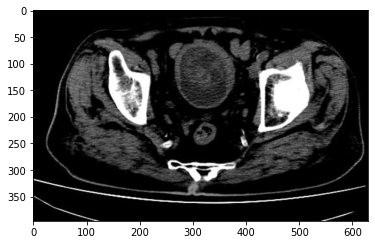

In [177]:
original_image = plt.imread('image1.jpeg',0)
# Convert to grayscale
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(original_image,cmap= 'gray')
time = []
name = []

## First Method

unsharp masking 

sharp image = 2image - g X image 

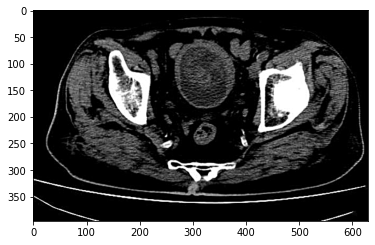

In [178]:
start = timeit.default_timer()
gaussian = cv2.GaussianBlur(original_image, (0, 0), 2.0)
sharp_image_1 = cv2.addWeighted(original_image, 2.0, gaussian, -1.0, 0)
time.append(timeit.default_timer()-start)
name.append("unsharp masking")
plt.imshow(sharp_image_1,cmap='gray')

## Second Method

second deriative or guassian laplacian

sharp_image = image - a X Laplacian( g * image)

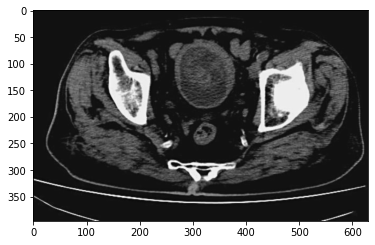

In [179]:
start = timeit.default_timer()
gaussian = cv2.GaussianBlur(original_image, (0, 0), 2.0)
# Calculate the Laplacian
lap = cv2.Laplacian(gaussian,cv2.CV_64F)
# Calculate the sharpened image
sharp_image_2 = original_image -0.7*lap
time.append(timeit.default_timer()-start)
name.append("gaussian laplace")
#show data 
plt.imshow(sharp_image_2,cmap='gray')

## Third Method

unsharp mask in frequency domain
sharp_image = image + f-1 (highpassfilter)

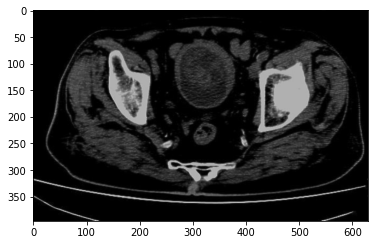

In [180]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

start = timeit.default_timer()
d0 = 100
# perform FFT
original = np.fft.fft2(original_image)
# get spectrum
center = np.fft.fftshift(original)
# center spectrum for high pass
HighPassCenter = center * gaussianHP(d0,original_image.shape)
# perform high pass
HighPass = np.fft.ifftshift(HighPassCenter)
# reverse FFT -> IFFT
inverse_HighPass = np.fft.ifft2(HighPass)
# add filter to original image
sharp_image_3 = original_image+np.abs(inverse_HighPass)
time.append(timeit.default_timer()-start)
name.append("unsharp mask freq. domain")
plt.imshow(sharp_image_3,cmap="gray")


## Forth Method

sharpening with laplace

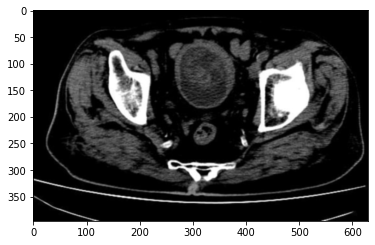

In [181]:
start = timeit.default_timer()
# calculate laplacian
lap = cv2.Laplacian(original_image,cv2.CV_64F)
# Calculate the sharpened image
sharp_image_4 = original_image +0.2*lap
time.append(timeit.default_timer()-start)
name.append('laplace')
#show data 
plt.imshow(sharp_image_4,cmap='gray')

### Compare different methods quality and time.

compare time

In [182]:
for i in range(4):
  print(str(name[i])+ " : "+str(time[i]))

unsharp masking : 0.001649779000217677
sharpening + seccond deriative : 0.007469854999726522
unsharp mask freq. domain : 0.31702614499954507
sharpening + laplace : 0.0027318880001985235


compare quality

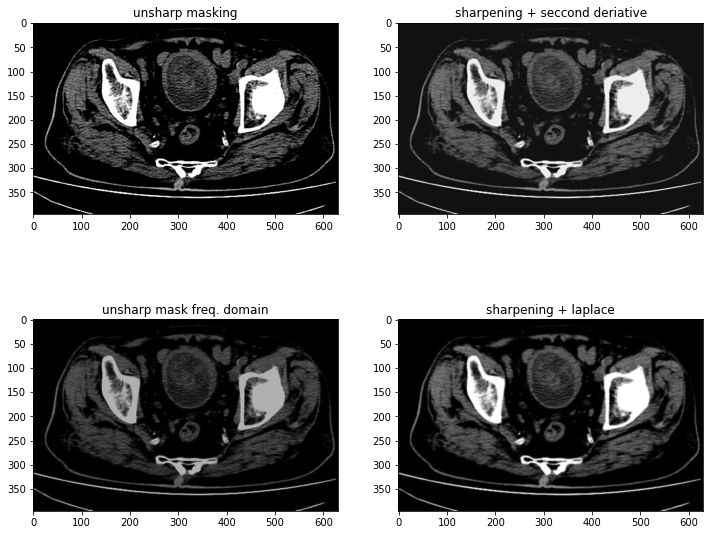

In [183]:
plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(sharp_image_1,cmap="gray")
plt.title(name[0])
plt.subplot(222)
plt.imshow(sharp_image_2,cmap="gray")
plt.title(name[1])
plt.subplot(223)
plt.imshow(sharp_image_3,cmap="gray")
plt.title(name[2])
plt.subplot(224)
plt.imshow(sharp_image_4,cmap="gray")
plt.title(name[3])
plt.show()

with comparison between results and time it seems unsharp masking do better than the other and after that laplacian will lead to better output. laplace of gaussian distribution is in third place and worst result in time and output is while switching into frequency domain.